In [473]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from warnings import filterwarnings
filterwarnings('ignore')

In [474]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [475]:
df.shape

(303, 14)

In [476]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [477]:
df = df.drop_duplicates()
df.shape
df.info()
df_out = df.copy()
df[['ca']] = df[['ca']].astype(object)
df[['thal']] = df[['thal']].astype(object)
df[['sex']] = df[['sex']].astype(object)




df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   se

In [478]:
df = pd.get_dummies(df, columns=['ca' , 'thal'] , drop_first=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,0,1,False,False,False,False,True,False,False
1,37,1,2,130,250,0,1,187,0,3.5,0,1,False,False,False,False,False,True,False
2,41,0,1,130,204,0,0,172,0,1.4,2,1,False,False,False,False,False,True,False
3,56,1,1,120,236,0,1,178,0,0.8,2,1,False,False,False,False,False,True,False
4,57,0,0,120,354,0,1,163,1,0.6,2,1,False,False,False,False,False,True,False


In [479]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,-0.221476,0.177199,0.225501,0.161547,-0.085556,0.062601,-0.131350,0.106699
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,-0.283609,0.097971,-0.019737,0.067417,0.079090,0.141826,-0.379223,0.323934
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,0.432080,-0.044044,-0.170700,-0.106898,0.032207,-0.072548,0.264734,-0.235765
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,-0.146269,-0.058894,0.088883,0.080456,0.010885,0.076697,-0.142033,0.110668
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,-0.081437,0.016451,0.058357,0.097674,-0.067831,-0.095015,-0.000451,0.056239
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,-0.026826,-0.015508,0.121620,0.075530,0.032859,0.091039,-0.085659,0.029896
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,0.134874,-0.049430,-0.057161,-0.064144,0.049310,-0.012699,0.026966,-0.020700
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,0.419955,-0.194158,-0.055734,-0.174930,0.038916,-0.159190,0.292634,-0.213326
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,-0.435601,0.149188,0.096626,0.012586,-0.019205,0.062550,-0.327154,0.298946
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,-0.429146,-0.013188,0.217536,0.188780,-0.091729,0.104038,-0.337298,0.300503


In [480]:
from sklearn.model_selection import train_test_split
y = df['target'].values
X = df.drop('target' , axis=1)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.25 , random_state=402)

In [481]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [482]:
from sklearn.naive_bayes import GaussianNB

In [483]:
NBmodel = GaussianNB()
NBmodel.fit(X_train_scaled, y_train)

GaussianNB()

In [484]:
y_predic = NBmodel.predict(X_test_scaled)

In [485]:
pd.DataFrame(y_predic , y_test)

,0
1,1
1,1
0,0
0,0
0,0
...,...
0,0
0,0
1,1
1,1


In [486]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


cm2 = confusion_matrix(y_test,y_predic)
score2 = accuracy_score(y_test,y_predic)
cr2 = classification_report(y_test,y_predic)
auc2 = roc_auc_score(y_test,y_predic)

In [487]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )
print('Accuracy Score for Naive Bayes:',score2 )
print('Classification Report for Naive Bayes:''\n''\n',cr2)

Confusion Matrix for Naive Bayes:
 [[32  9]
 [ 5 30]]
Accuracy Score for Naive Bayes: 0.8157894736842105
Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.77      0.86      0.81        35

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



In [488]:
print('Auc Score for Naive Bayes:',auc2 )

Auc Score for Naive Bayes: 0.818815331010453


(0.0, 1.05)

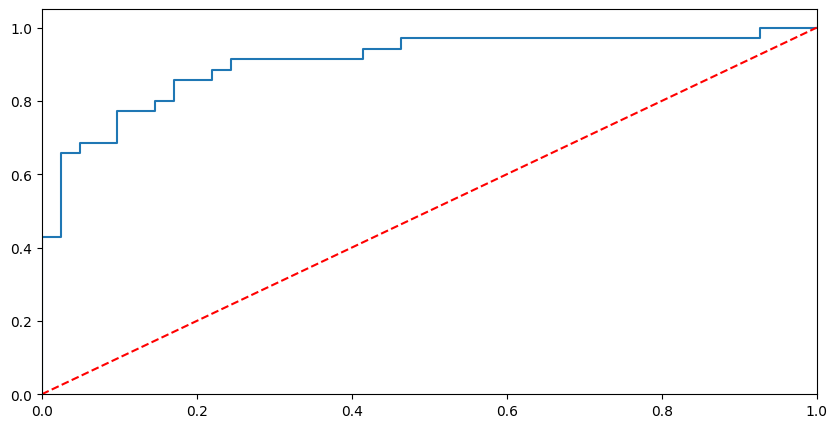

In [489]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, NBmodel.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [490]:
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)
y_predict = logmodel.predict(X_test_scaled)

In [491]:
pd.DataFrame(y_predict , y_test)

,0
1,0
1,1
0,0
0,0
0,0
...,...
0,0
0,0
1,1
1,1


In [492]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.79      0.89      0.84        35

    accuracy                           0.84        76
   macro avg       0.84      0.85      0.84        76
weighted avg       0.85      0.84      0.84        76



In [493]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))
from sklearn.metrics import roc_curve #https://scikit-learn.org/stable/modules/model_evaluation.html -> for acc metrics
roc_auc_score(y_test,y_predict)

[[33  8]
 [ 4 31]]


0.8452961672473869

(0.0, 1.05)

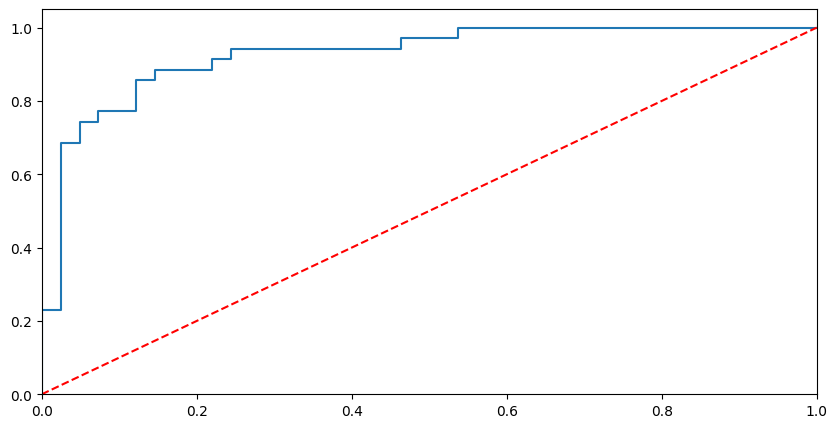

In [494]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [495]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', probability=True) 

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
pd.DataFrame(y_pred , y_test)

,0
1,0
1,1
0,0
0,0
0,0
...,...
0,0
0,0
1,1
1,1


In [496]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8026315789473685


In [497]:
print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7777777777777778
Recall: 0.8


In [498]:
print("Classification Report for SVM:""\n",classification_report(y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.78      0.80      0.79        35

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



In [499]:
cm3 = confusion_matrix(y_test,y_pred)
score3 = accuracy_score(y_test,y_pred)
cr3 = classification_report(y_test,y_pred)
auc3 = roc_auc_score(y_test,y_pred)

In [500]:
print('Confusion Matrix for SVM:''\n',cm3 )
print('Accuracy Score for SVM:',score3 )
print('Auc Score for svm:',auc3 )

Confusion Matrix for SVM:
 [[33  8]
 [ 7 28]]
Accuracy Score for SVM: 0.8026315789473685
Auc Score for svm: 0.802439024390244


(0.0, 1.05)

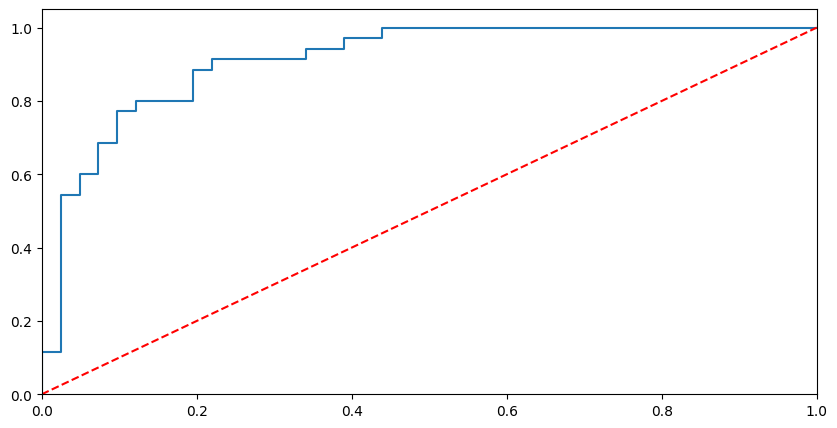

In [501]:
SVM_roc_auc = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [502]:
from sklearn import svm

clf = svm.SVC(kernel='poly', probability=True) 

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
pd.DataFrame(y_pred , y_test)

,0
1,0
1,1
0,0
0,0
0,0
...,...
0,0
0,0
1,1
1,1


In [503]:
from sklearn import metrics

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))
print("Classification Report for SVM:""\n",classification_report(y_test, y_pred))
cm3 = confusion_matrix(y_test,y_pred)
score3 = accuracy_score(y_test,y_pred)
cr3 = classification_report(y_test,y_pred)
auc3 = roc_auc_score(y_test,y_pred)
print('Confusion Matrix for SVM:''\n',cm3 )
print('Accuracy Score for SVM:',score3 )
print('Auc Score for svm:',auc3 )

Precision: 0.6875
Recall: 0.9428571428571428
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75        41
           1       0.69      0.94      0.80        35

    accuracy                           0.78        76
   macro avg       0.81      0.79      0.77        76
weighted avg       0.82      0.78      0.77        76

Confusion Matrix for SVM:
 [[26 15]
 [ 2 33]]
Accuracy Score for SVM: 0.7763157894736842
Auc Score for svm: 0.7885017421602788


(0.0, 1.05)

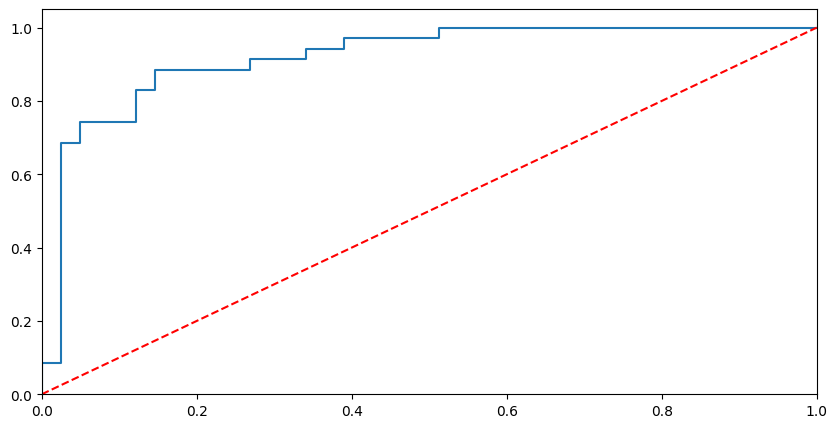

In [504]:
SVM_roc_auc = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [505]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7 , metric = 'euclidean')
KNN_model = classifier.fit(X_train_scaled, y_train)
y_pred = KNN_model.predict(X_test_scaled)

In [506]:
pd.DataFrame(y_pred , y_test)

,0
1,1
1,1
0,0
0,0
0,0
...,...
0,0
0,0
1,1
1,1


In [507]:
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[31 10]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        41
           1       0.77      0.94      0.85        35

    accuracy                           0.84        76
   macro avg       0.85      0.85      0.84        76
weighted avg       0.86      0.84      0.84        76

0.8494773519163763


In [508]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator = KNN_model, X = X_train_scaled, y = y_train, cv = 5, scoring=['f1','roc_auc','recall'])
accuracies['test_roc_auc'].mean()

0.8795987854251013

In [509]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [510]:
clf = DecisionTreeClassifier(criterion = 'entropy' , random_state = 42)

clf = clf.fit(X_train_scaled,y_train)
y_pred = clf.predict(X_test_scaled)

In [511]:
pd.DataFrame(y_pred , y_test)

,0
1,0
1,1
0,0
0,0
0,0
...,...
0,0
0,0
1,1
1,1


In [512]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

print(roc_auc_score(y_test,y_pred))

Accuracy: 0.7894736842105263
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.74      0.83      0.78        35

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76

0.7923344947735191


In [513]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator = clf, X = X_train, y = y_train, cv = 5, scoring=['f1','roc_auc','recall'])
accuracies['test_roc_auc'].mean()

0.6859554655870446

In [514]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state = None)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=10)

In [515]:
y_pred = rf.predict(X_test_scaled)


In [516]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))
print(roc_auc_score(y_test,y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.80      0.80      0.80        35

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76

0.8146341463414635
